# Animation Template

In [1]:
# --------IMPORTING LIBRARIES--------

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


The initial steps of creating our animation is very similar to just plotting functions and lines. You will format the display and plot any non-moving objects in the same way. There's a slight difference in plotting the objects that will be animated, you need to name their plots and follow the name with a comma. 

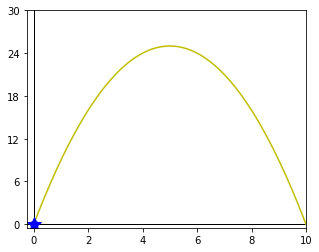

In [2]:
# --------FORMATTING THE DISPLAY--------

# Setting the size of the display window
fig = plt.figure(figsize = (5, 4))
# Setting the axes sizes
plt.xlim((-0.2, 10))
plt.ylim((-0.5, 30))
# Setting the axes markers 
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([0, 6, 12, 18, 24, 30])
# Plot axes lines
plt.axhline(0, color = 'black', lw =1)
plt.axvline(0, color = 'black', lw = 1)


# --------PLOTTING POINTS AND FUNCTIONS--------

# Define and plot parabola 
def parabola(x):
    y = x*(10 - x)
    return y

X = np.linspace(0, 10, 200)
plt.plot(X, parabola(X), 'y-')


# --------CREATE ANIMATION OBJECTS--------

star, = plt.plot(0, 0, 'b*', markersize = 15)
xPoint, = plt.plot(0, 0, 'bo', markersize = 7)
yPoint, = plt.plot(0, 0, 'bo', markersize = 7)


An animation in python is created as a stop-motion video. That means to move an object we make slight changes to it's position each frame. To create our animation we will first decide on the length of our animation and inital and final values of our changing parameter. From these values the number and length of frames will be calculated. In this example, I will be moving a star and two points. The x-value of all three will be changing each frame, therefore I will decide on my intial and final x-value. Now it's time to update these three points, we will do that by writing them as an equation of i (the frame number). 

In [3]:
# --------ANIMATION FUNCTION--------

# Total animation time
T = 8
# Change in x every frame
deltaX = 0.05
# Initial x-value
x0 = 0
# Final x-value
xN = 10
# Number of frames and time intervals calculated from above information
N = abs(int(((xN - x0)/deltaX) + 1))
deltaT = T*1000/N

# This animate function will create each frame in our stop-motion animation. The parameter i is the frame number. 
def animate(i):
    
    # Write x as a functiom of i. 
    # The intial position is x0 and each frame we add another step (deltaX) to x (the star's horizontial position).
    x = x0 + (deltaX*i)
    # Using this new x-value, solve for the y-value with the parabola function.
    # Update the star's position with this new data. 
    star.set_data(x, parabola(x))
    
    # Update the x and y axis points. 
    # The x-point will use the new x-value and keep y at 0. 
    # The y-point will use the new x-value and the parabola function to set the y-value and then keep x at 0. 
    xPoint.set_data(x, 0)
    yPoint.set_data(0, parabola(x))
    
    # We need to finish the animation function by returning our moving objects. 
    return star, xPoint, yPoint

anim = animation.FuncAnimation(fig, animate, frames=N, interval = deltaT, repeat = False)
HTML(anim.to_html5_video())
